# TASK 6.5

## Table of Content

# 1. Importing Libraries and Datasets

`conda install quandl`

In [38]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.


warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [39]:
# Creating a path to import dataframe


path = r'C:\Users\Lucero\Documents\Adidas US Sales'

In [40]:
# Importing Dataframe 

df = pd.read_csv(os.path.join(path,'Adidas Prepared Data','Adidas Historical Data.csv'), index_col = False)

In [41]:
df

,Date,Year,Close,Volume,Open,High,Low
0,7/14/2023,2023,97.006,16863,96.895,97.8100,96.78
1,7/13/2023,2023,97.690,18391,97.060,97.9300,96.96
2,7/12/2023,2023,96.805,18008,96.055,97.1798,95.67
3,7/11/2023,2023,94.720,19380,93.385,94.8300,92.98
4,7/10/2023,2023,92.200,34331,91.155,92.3500,91.09
...,...,...,...,...,...,...,...
1253,7/20/2018,2018,111.070,33819,110.500,111.2700,110.50
1254,7/19/2018,2018,110.100,20006,109.662,110.4700,109.65
1255,7/18/2018,2018,110.270,24595,109.890,110.3400,109.89
1256,7/17/2018,2018,108.670,48042,109.000,109.1000,108.58


In [42]:
## Aggregate daily data to monthly data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
monthly_data = df.resample('M').mean()
monthly_data['YearMonth'] = monthly_data.index.strftime('%Y-%m')
# monthly_data.reset_index(inplace=True)

In [44]:
monthly_data.head()

,Year,Close,Volume,Open,High,Low,YearMonth
Date,,,,,,,
2018-07-31,2018.0,110.477500,26043.333333,110.323500,110.816667,109.918750,2018-07
2018-08-31,2018.0,118.412065,39292.304348,118.384087,118.950617,117.807304,2018-08
2018-09-30,2018.0,121.987895,33845.789474,121.817368,122.537158,121.437968,2018-09
2018-10-31,2018.0,116.646522,27677.304348,116.810870,117.490261,115.846957,2018-10
2018-11-30,2018.0,115.162262,58041.761905,114.981143,115.787381,114.267476,2018-11


In [46]:
monthly_data.shape

(61, 7)

In [47]:
monthly_data.columns

Index(['Year', 'Close', 'Volume', 'Open', 'High', 'Low', 'YearMonth'], dtype='object')

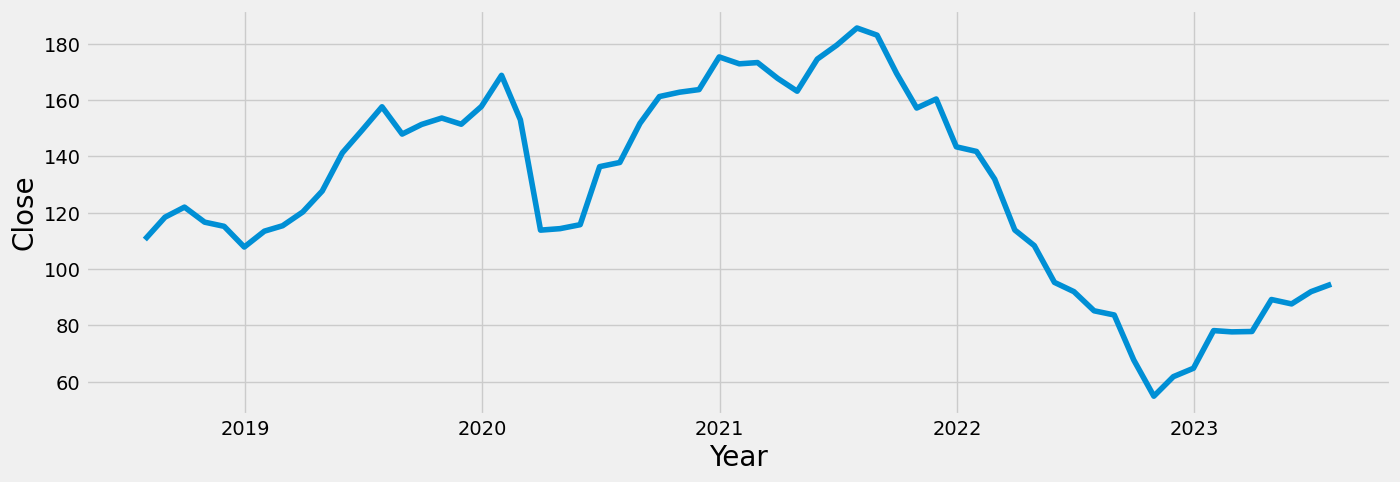

In [48]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.xlabel('Year', fontsize=20)
plt.ylabel('Close', fontsize=20)

plt.plot(monthly_data['Close'])


In [49]:
# check for missing values
monthly_data.isnull().sum()

Year         0
Close        0
Volume       0
Open         0
High         0
Low          0
YearMonth    0
dtype: int64

#### No missing values

In [50]:
# Check for duplicates.

dups = monthly_data.duplicated()
dups.sum()

0

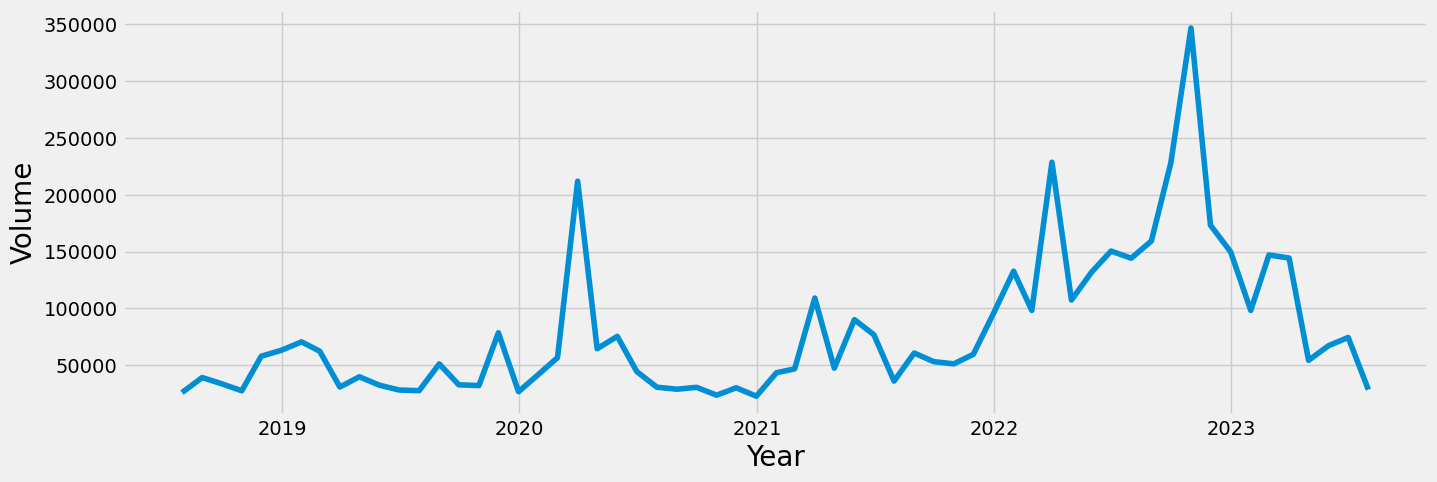

In [51]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.xlabel('Year', fontsize=20)
plt.ylabel('Volume', fontsize=20)

plt.plot(monthly_data['Volume'])

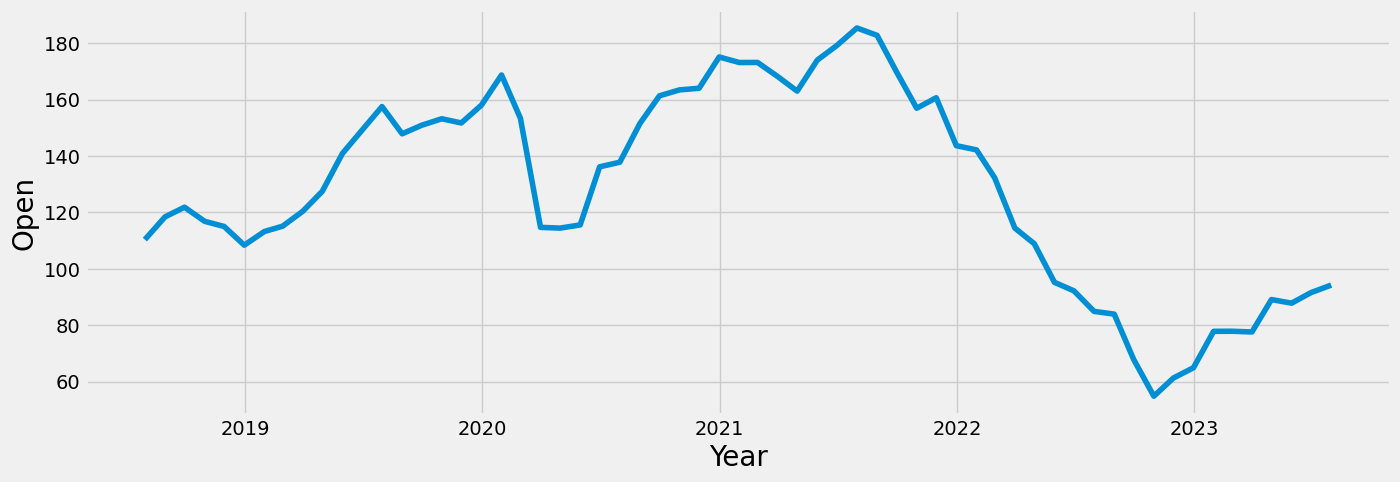

In [52]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.xlabel('Year', fontsize=20)
plt.ylabel('Open', fontsize=20)

plt.plot(monthly_data['Open'])

# 3.Time-series analysis: decomposition

In [53]:
# Create a subset for O3 Mean from the data.
df_2=monthly_data
df_2=monthly_data.iloc[:,[1,3]]

In [55]:
columns_to_drop = ['Open']
df_2.drop(columns_to_drop, axis=1, inplace=True)

In [56]:
df_2

,Close
Date,
2018-07-31,110.477500
2018-08-31,118.412065
2018-09-30,121.987895
2018-10-31,116.646522
2018-11-30,115.162262
...,...
2023-03-31,77.816522
2023-04-30,89.172900
2023-05-31,87.616591


In [57]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_2, model='additive')

In [58]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

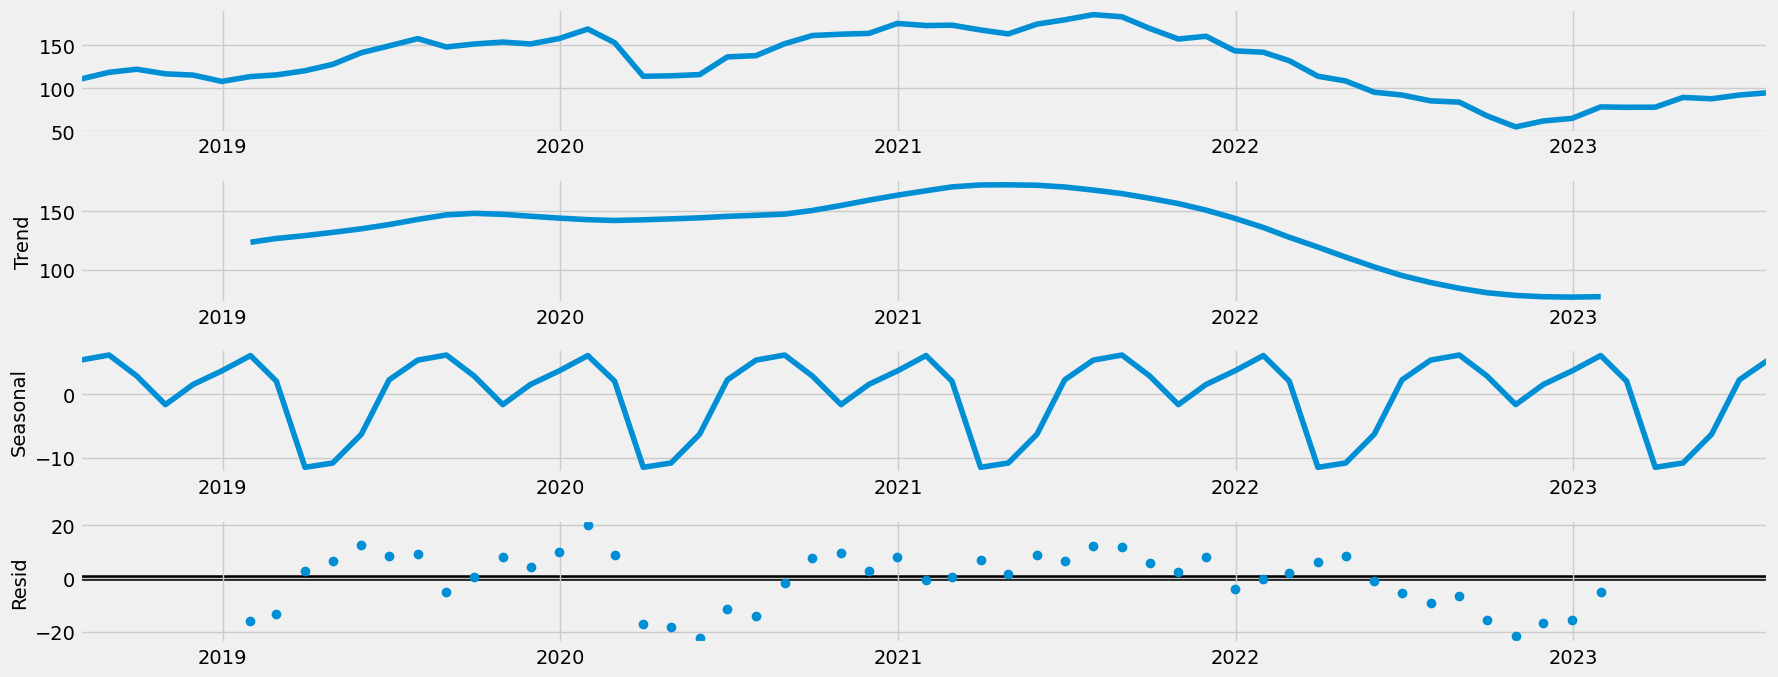

In [59]:
# Plot the separate components

decomposition.plot()
plt.show()

In [65]:
# Create a subset for CO Mean from the data.
df_3=monthly_data
df_3=monthly_data.iloc[:,[2]]

In [66]:
df_3

,Volume
Date,
2018-07-31,26043.333333
2018-08-31,39292.304348
2018-09-30,33845.789474
2018-10-31,27677.304348
2018-11-30,58041.761905
...,...
2023-03-31,144255.304348
2023-04-30,54444.736842
2023-05-31,67366.909091


In [67]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_3, model='additive')

In [68]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

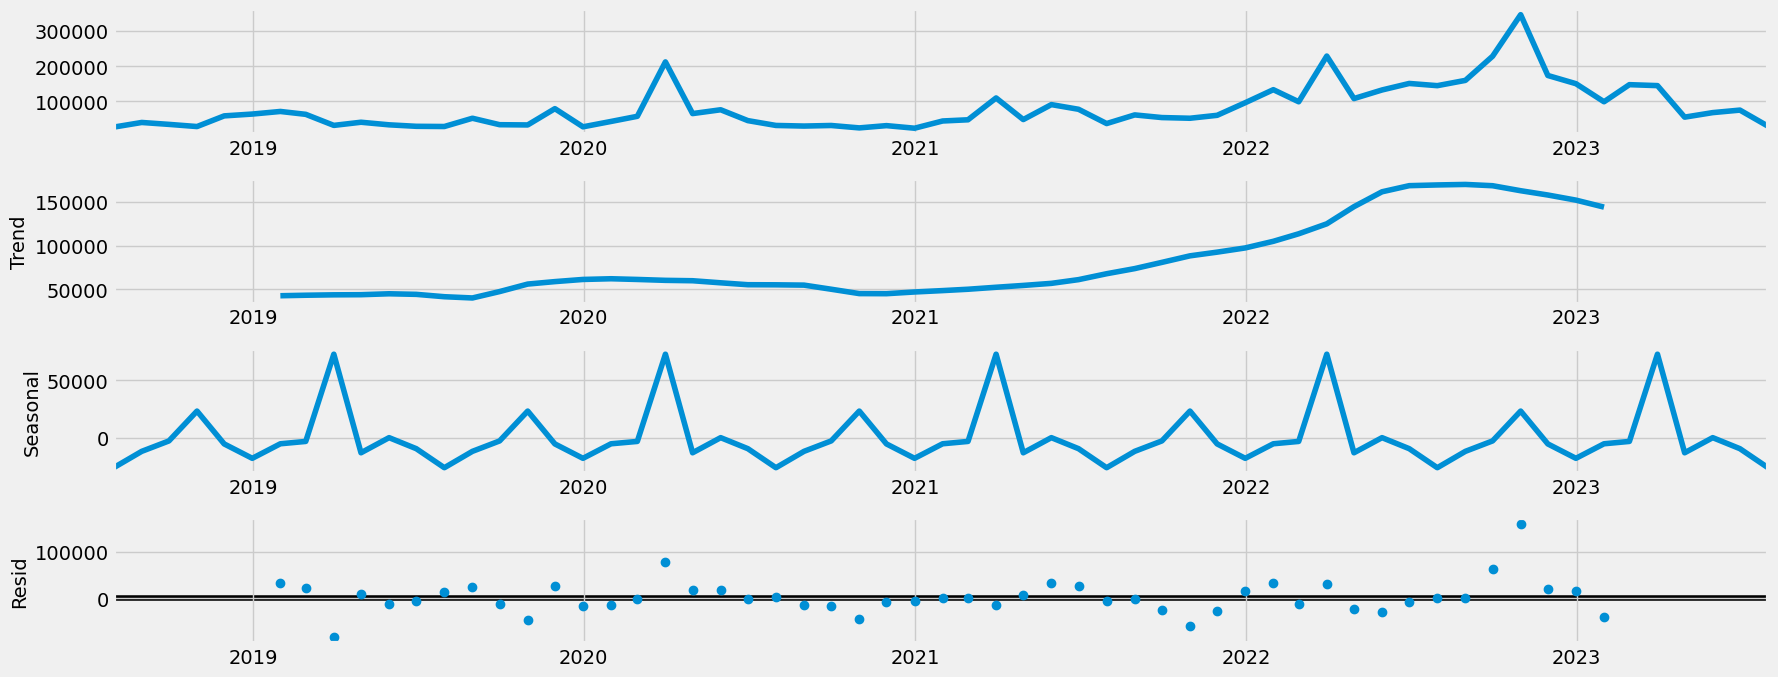

In [69]:
# Plot the separate components

decomposition.plot()
plt.show()

In [70]:
# Create a subset for SO2 Mean from the data.
df_4=monthly_data
df_4=monthly_data.iloc[:,[3]]

In [71]:
df_4

,Open
Date,
2018-07-31,110.323500
2018-08-31,118.384087
2018-09-30,121.817368
2018-10-31,116.810870
2018-11-30,114.981143
...,...
2023-03-31,77.573478
2023-04-30,89.059211
2023-05-31,87.781500


In [72]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_4, model='additive')

In [73]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

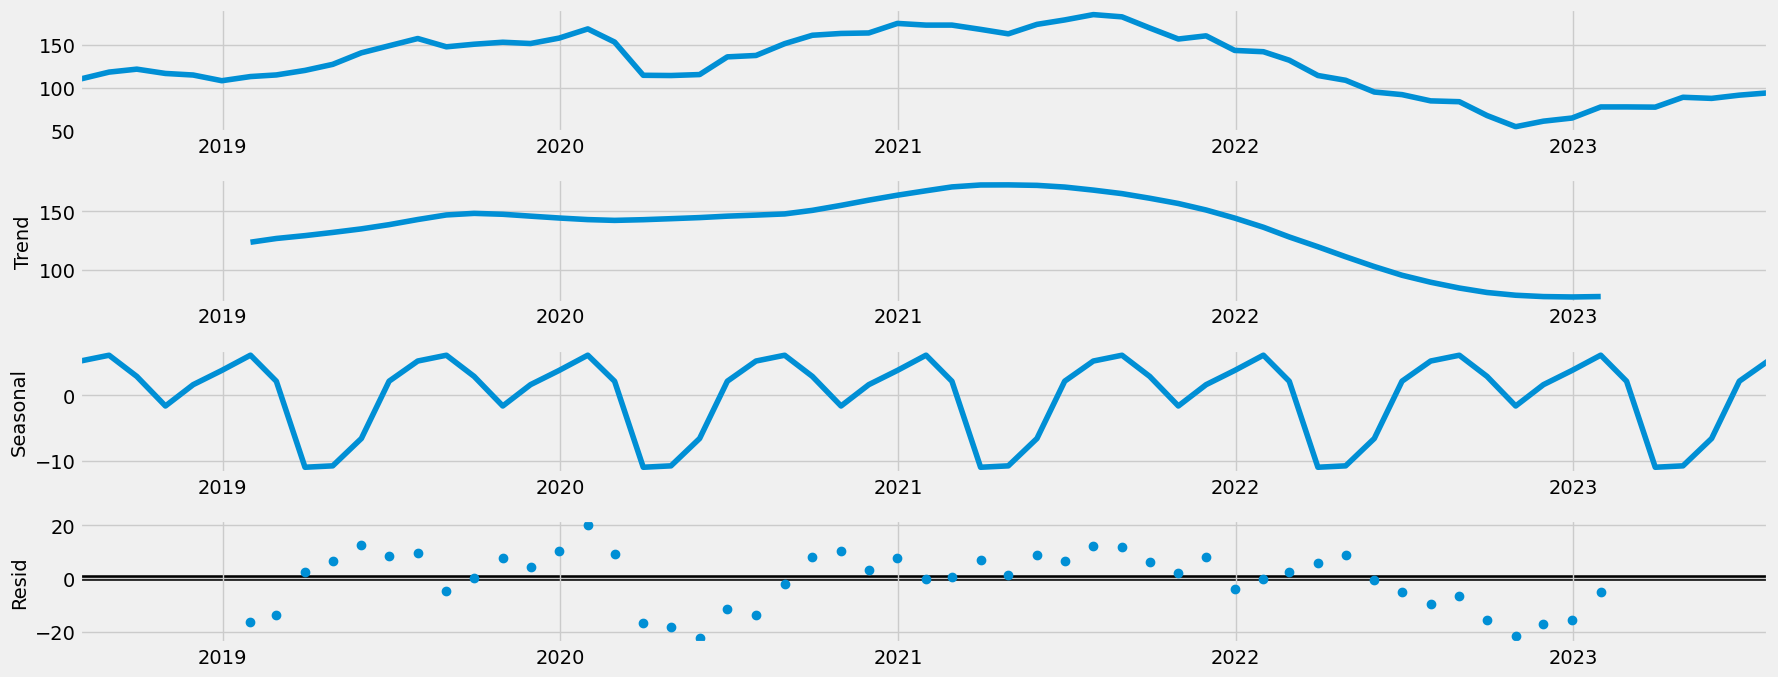

In [74]:
# Plot the separate components

decomposition.plot()
plt.show()

# 4. Testing for stationarity

In [75]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_2['Close'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.310939
p-value                         0.624153
Number of Lags Used             1.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


### Test-Statistic is more than Critical Value, meaning the data is non-stationary.

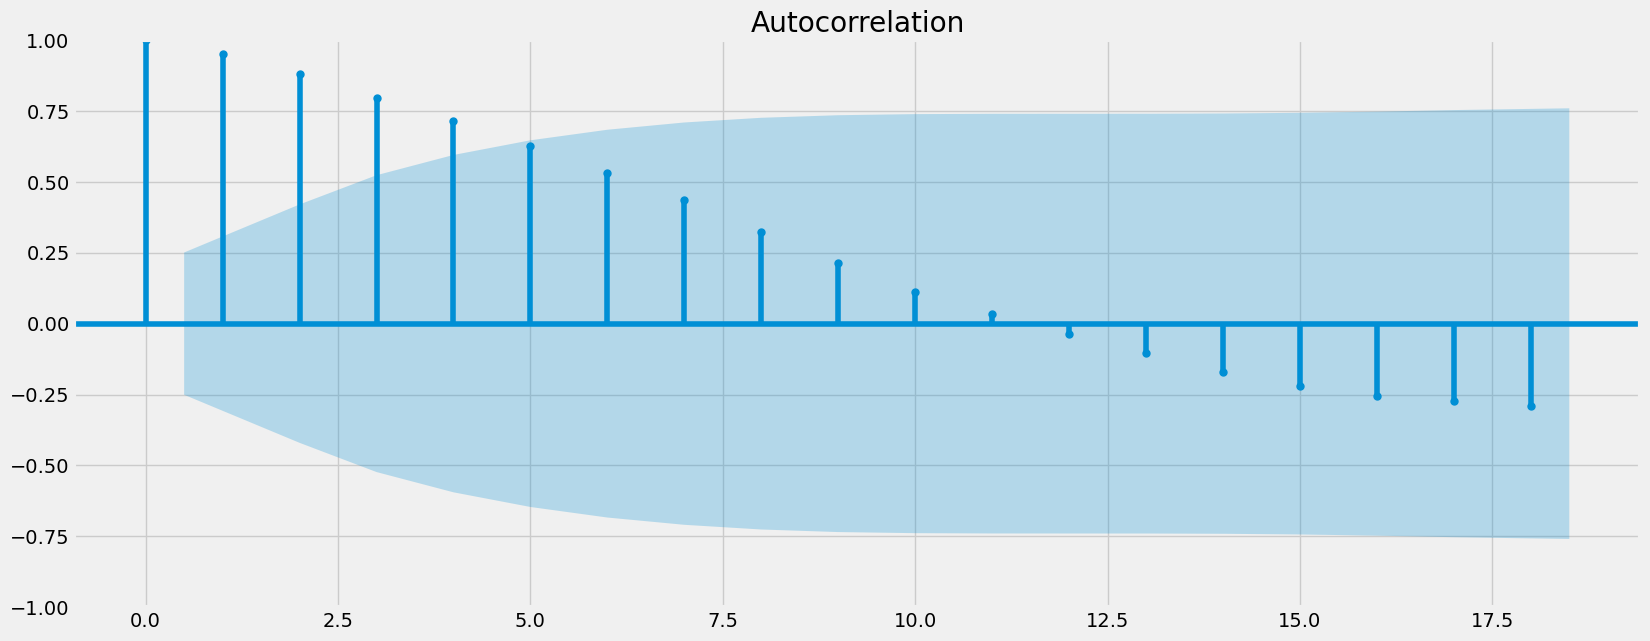

In [76]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_2)
plt.show()

In [77]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_3['Volume'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.455299
p-value                         0.126733
Number of Lags Used             1.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


### Test-Statistic is more than Critical Value, meaning the data is non-stationary.

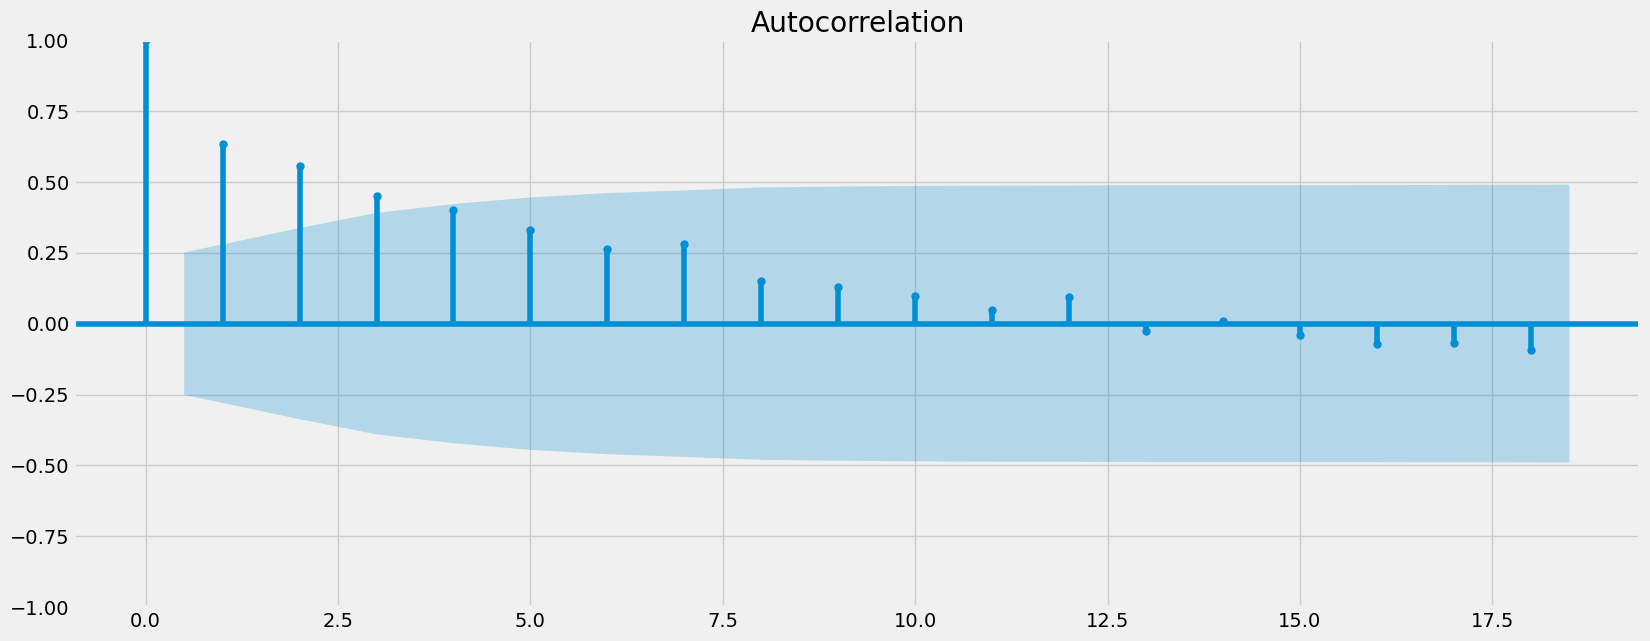

In [78]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_3)
plt.show()

In [79]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_4['Open'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.312499
p-value                         0.623435
Number of Lags Used             1.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


### Test-Statistic is more than Critical Value, meaning the data is non-stationary.

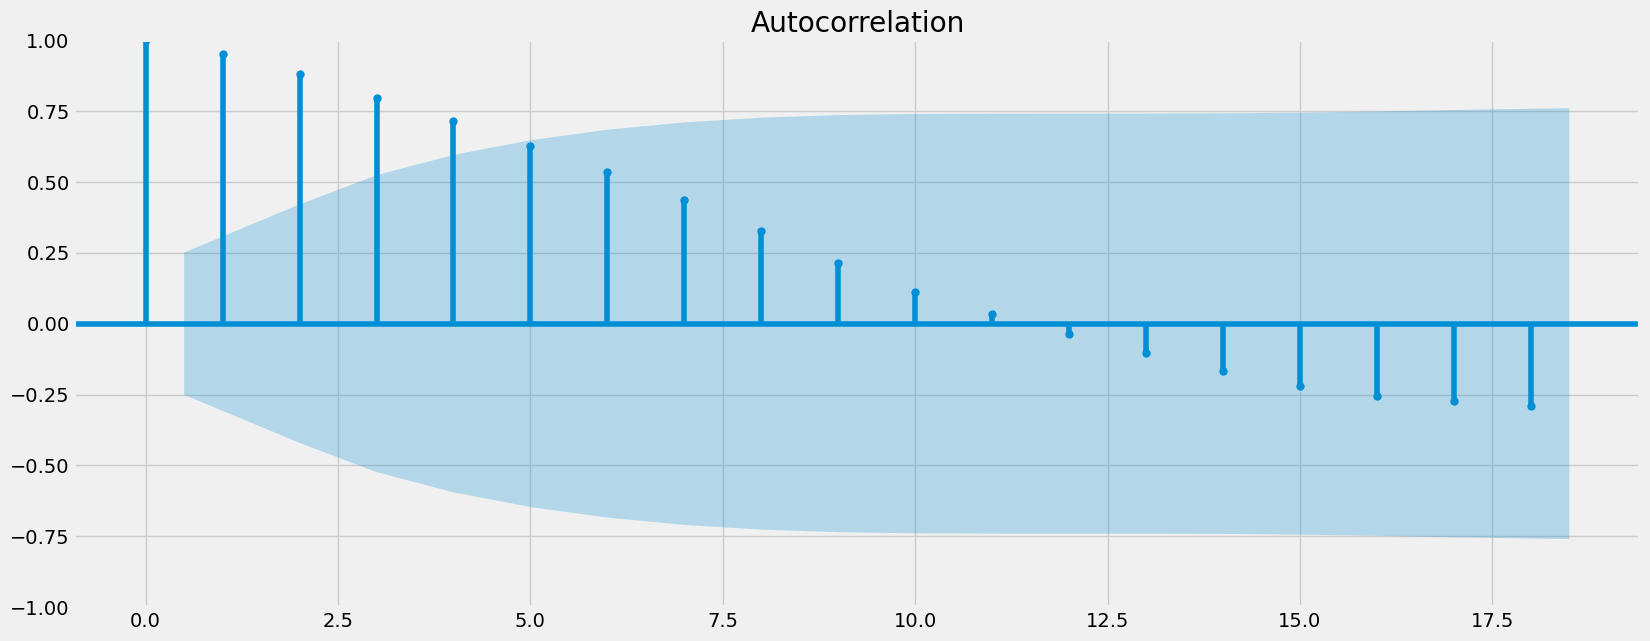

In [80]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_4)
plt.show()

# 5. Stationarizing the data

In [81]:
df_diff_2 = df_2 - df_2.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [87]:
df_diff_2.head()

,Close
Date,
2018-07-31,NaN
2018-08-31,7.934565
2018-09-30,3.575830
2018-10-31,-5.341373
2018-11-30,-1.484260


In [90]:
df_diff_2.isnull().sum()

Close    1
dtype: int64

In [91]:
df_diff_2.dropna(inplace = True)

In [92]:
df_diff_2.isnull().sum()

Close    0
dtype: int64

In [93]:
df_diff_2.columns

Index(['Close'], dtype='object')

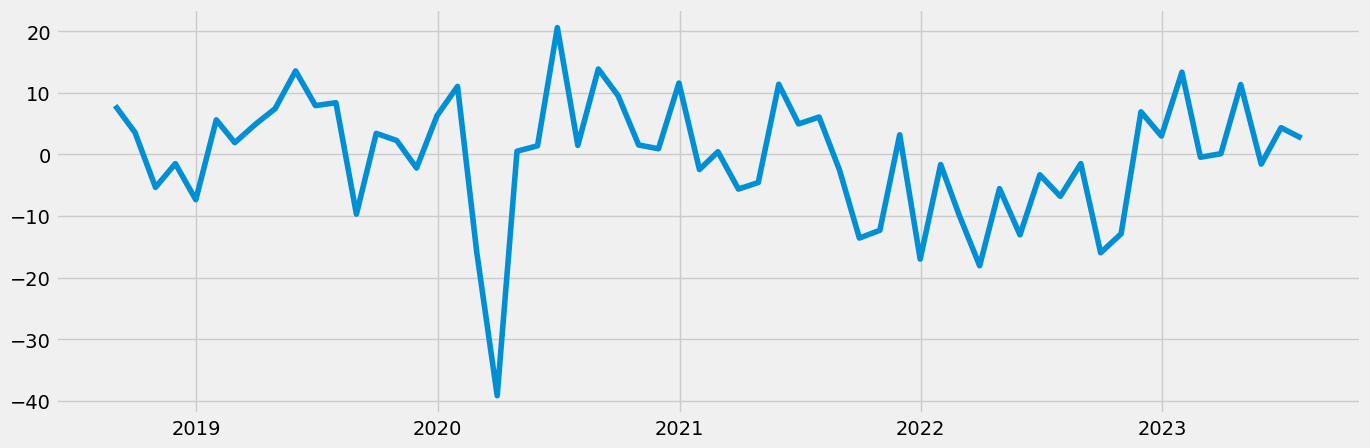

In [94]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff_2)

In [95]:
dickey_fuller(df_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                 -5.646887
p-value                         0.000001
Number of Lags Used             0.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


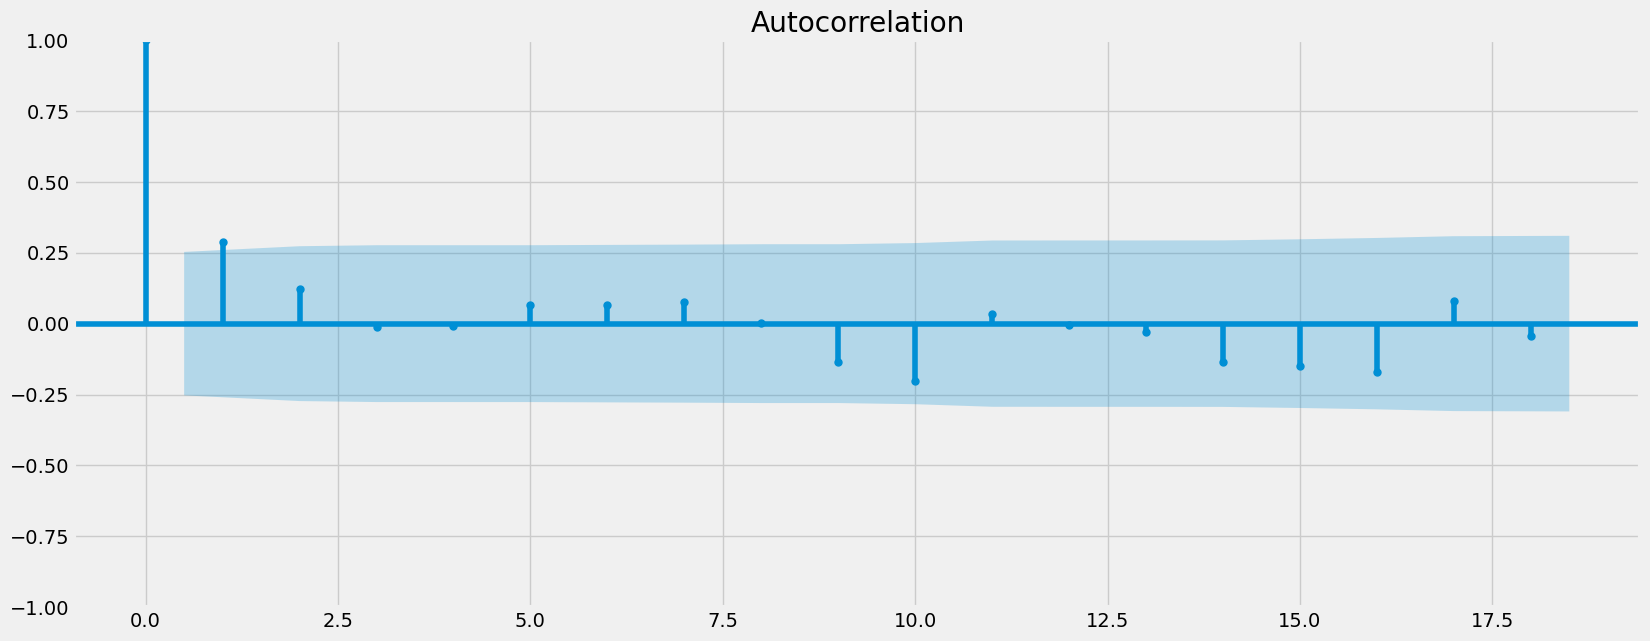

In [96]:
plot_acf(df_diff_2)
plt.show()

### After stationarizing the data, the Test-Statistic is less than Critical Value, meaning we can reject null hypothesis and accept alternative hypothesis

In [97]:
df_diff_3 = df_3 - df_3.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [98]:
df_diff_3.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [99]:
df_diff_3.head()

,Volume
Date,
2018-08-31,13248.971014
2018-09-30,-5446.514874
2018-10-31,-6168.485126
2018-11-30,30364.457557
2018-12-31,5201.974937


In [100]:
df_diff_3.columns

Index(['Volume'], dtype='object')

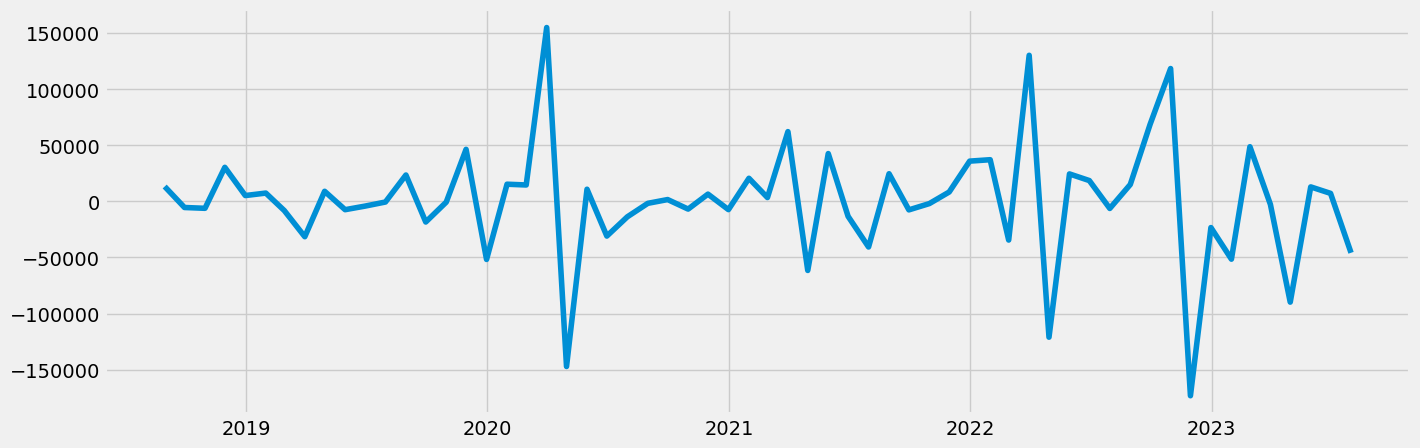

In [101]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff_3)

In [102]:
dickey_fuller(df_diff_3)

Dickey-Fuller Stationarity test:
Test Statistic                -1.135372e+01
p-value                        9.850964e-21
Number of Lags Used            0.000000e+00
Number of Observations Used    5.900000e+01
Critical Value (1%)           -3.546395e+00
Critical Value (5%)           -2.911939e+00
Critical Value (10%)          -2.593652e+00
dtype: float64


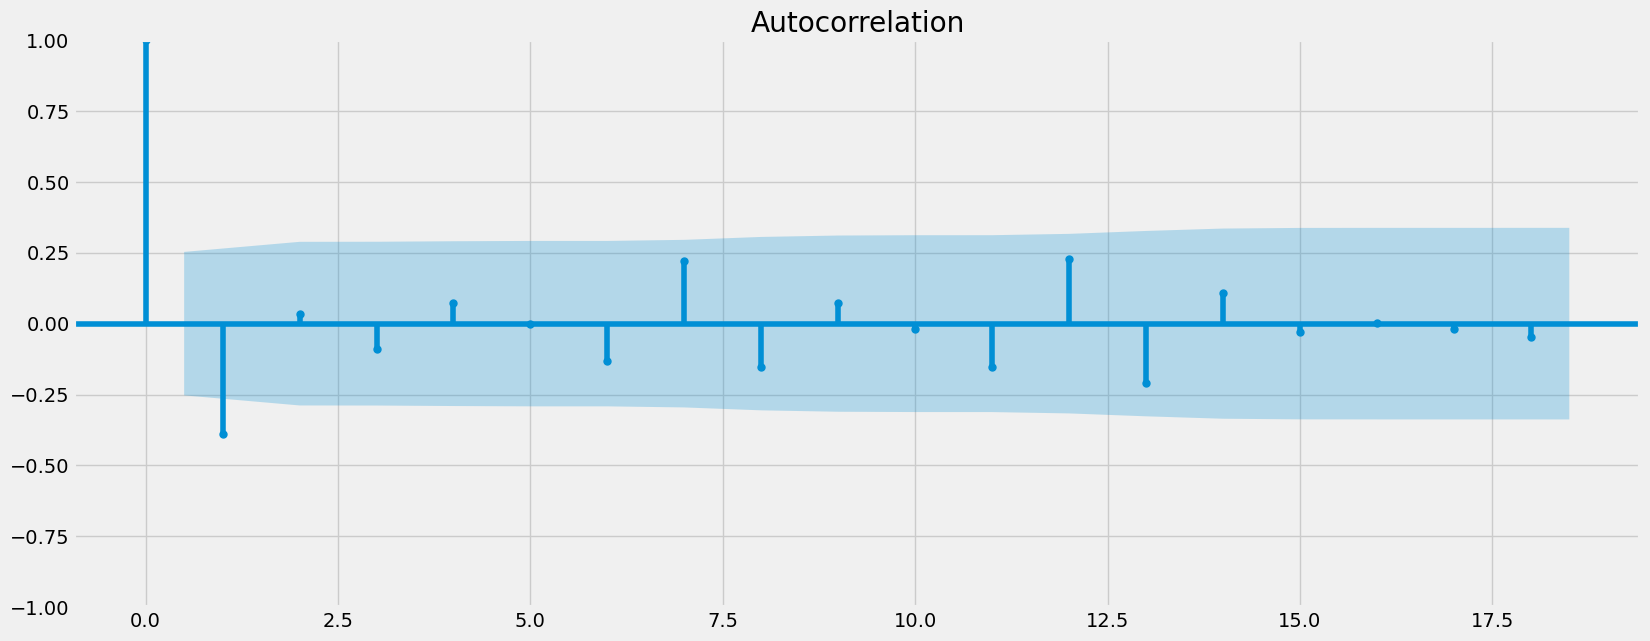

In [103]:
plot_acf(df_diff_3)
plt.show()

### After stationarizing the data, the Test Statistic is greater than the critical value, which means that I cannot reject the null hypothesis.

In [104]:
df_diff_4 = df_4 - df_4.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [105]:
df_diff_4.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [106]:
df_diff_4.head()

,Open
Date,
2018-08-31,8.060587
2018-09-30,3.433281
2018-10-31,-5.006499
2018-11-30,-1.829727
2018-12-31,-6.631511


In [107]:
df_diff_4.columns

Index(['Open'], dtype='object')

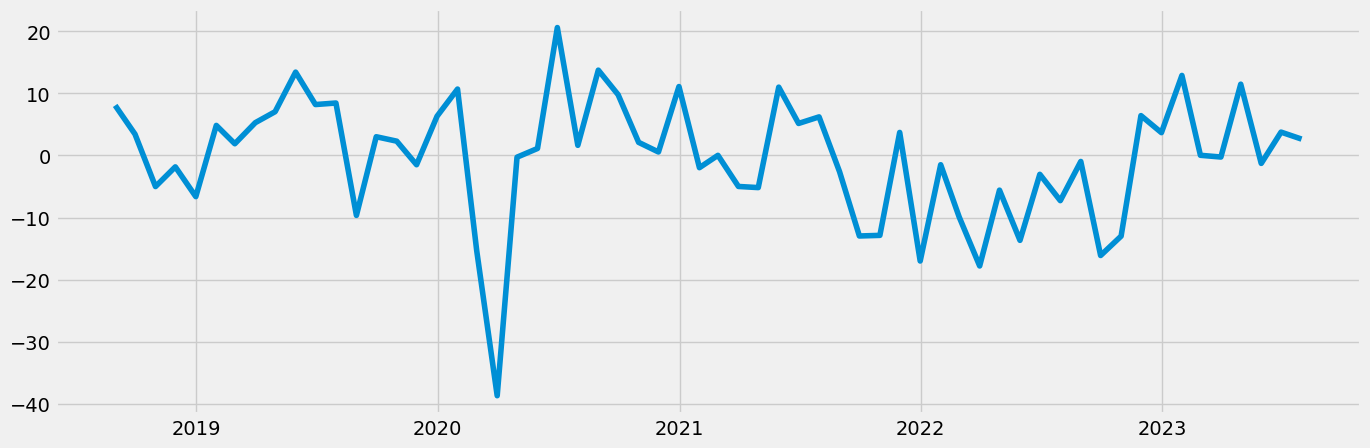

In [108]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff_4)

In [109]:
dickey_fuller(df_diff_4)

Dickey-Fuller Stationarity test:
Test Statistic                 -5.581534
p-value                         0.000001
Number of Lags Used             0.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


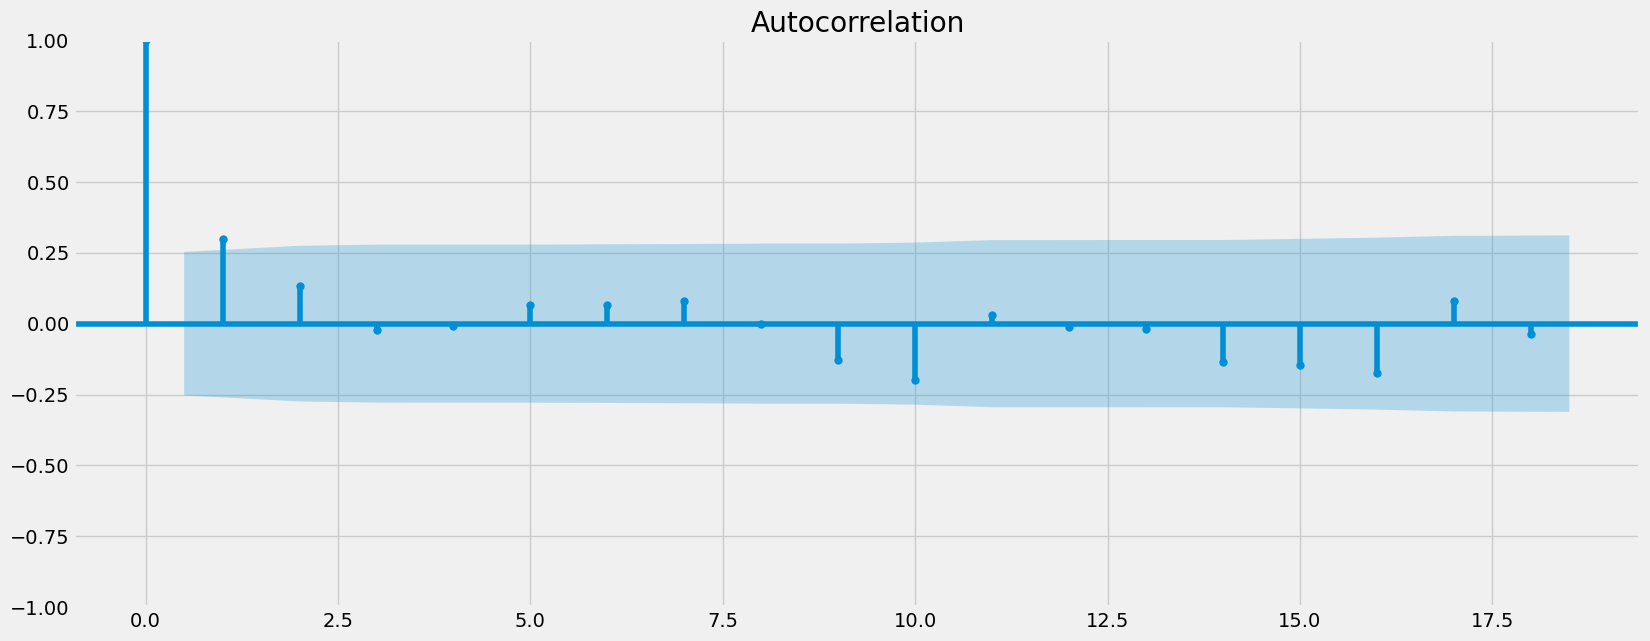

In [110]:
plot_acf(df_diff_4)
plt.show()

### After stationarizing the data, the Test-Statistic is less than Critical Value, meaning we can reject null hypothesis and accept alternative hypothesis.